<a href="https://colab.research.google.com/github/jwa0301/OUTTA_bootcamp/blob/main/main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Setup (Do NOT modify)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/final
!pip install openai-clip

Mounted at /content/drive
/content/drive/MyDrive/final
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368606 sha256=2c6a2a31a949dd64da0ac66a90c7e77393aee7f93a781981afbf90d15126fa5a
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [ ]:
#@title Data preprocessing (Train)
!python preproc_datasets_celeba_zip_train.py --source=./multimodal_celeba_hq.zip --dest train_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

In [ ]:
#@title Data preprocessing (Test)
!python preproc_datasets_celeba_zip_test.py --source=./multimodal_celeba_hq.zip --dest test_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

In [ ]:
#@title Train

train_data = "train_data_4cap.zip"#@param {"type": "string"}
batch_size = 36 #@param {"type": "integer"}
num_epochs = 20 #@param {"type": "integer"}
learning_rate = 0.0001 #@param {"type": "number"}
report_interval = 50 #@param {"type": "integer"}
noise_dim = 100 #@param {"type": "integer"}
projection_dim = 128 #@param {"type": "integer"}
clip_embedding_dim = 512 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}
result_path = "images_exp1" #@param {"type": "string"}
use_uncond_loss = True #@param {"type": "boolean"}
use_contrastive_loss = True #@param {"type": "boolean"}
num_stage = 3 #@param {"type": "integer"}
resume_checkpoint_path = "model_exp1" #@param {"type": "string"}
resume_epoch = 2 #@param {"type": "integer"}

test_cmd = f'''python main.py \
    --train_data "{train_data}" \
    --batch_size {batch_size} \
    --num_epochs {num_epochs} \
    --learning_rate {learning_rate} \
    --report_interval {report_interval} \
    --noise_dim {noise_dim} \
    --projection_dim {projection_dim} \
    --clip_embedding_dim {clip_embedding_dim} \
    --checkpoint_path "{checkpoint_path}" \
    --result_path "{result_path}" \
    --num_stage {num_stage} \
    --resume_epoch {resume_epoch} \
    '''
if use_uncond_loss:
    test_cmd += "--use_uncond_loss "
if use_contrastive_loss:
    test_cmd += "--use_contrastive_loss "
if resume_checkpoint_path != "None":
    test_cmd += f'''--resume_checkpoint_path "{resume_checkpoint_path}"'''

with open('./train_script.sh', 'w') as file:
    file.write(test_cmd)

!bash train_script.sh

Loading dataset
finish
Resumed from saved checkpoint
Epoch: 3 start
train_script.sh: line 1:  1137 Killed                  python main.py --train_data "train_data_4cap.zip" --batch_size 36 --num_epochs 20 --learning_rate 0.0001 --report_interval 50 --noise_dim 100 --projection_dim 128 --clip_embedding_dim 512 --checkpoint_path "model_exp1" --result_path "images_exp1" --num_stage 3 --resume_epoch 2 --use_uncond_loss --use_contrastive_loss --resume_checkpoint_path "model_exp1"


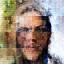

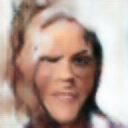

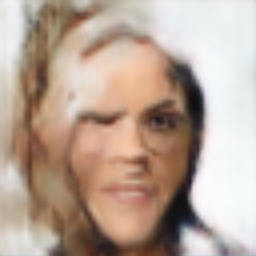

In [ ]:
#@title Test (Generate image)

prompt = "The woman is young and has blond hair, and arched eyebrows."#@param {"type": "string"}
load_epoch = 2 #@param {"type": "integer"}
checkpoint_path = "model_exp3" #@param {"type": "string"}

test_cmd = f'''python generate_image.py \
    --prompt "{prompt}" \
    --load_epoch {load_epoch} \
    --checkpoint_path "{checkpoint_path}"
    '''

with open('./test_script.sh', 'w') as file:
    file.write(test_cmd)

!bash test_script.sh


from IPython.display import Image
import os
img_64 = Image(os.path.join("result_64.png"))
display(img_64)
img_128 = Image(os.path.join("result_128.png"))
display(img_128)
img_256 = Image(os.path.join("result_256.png"))
display(img_256)


In [ ]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm

In [ ]:
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = Image.open(image_path)

    # Resize the image to the target size
    img = img.resize(target_size, Image.ANTIALIAS)

    # Convert the image to numpy array
    img_array = np.array(img)

    # Convert pixel values to range [0, 1]
    img_array = img_array / 255.0

    # Transpose the array to match the shape (3, H, W)
    img_array = img_array.transpose((2, 0, 1))

    return img_array

# Example usage
image_path = '/content/drive/MyDrive/final/result_256.png' # 이미지 경로
image1_array = load_and_preprocess_image(image_path, target_size=(256, 256))

image_path = '/content/drive/MyDrive/final/result_256.png' # 이미지 경로
image2_array = load_and_preprocess_image(image_path, target_size=(256, 256))

<ipython-input-5-3fd13b50e403>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [ ]:
# fid between act1 and act1
fid = calculate_fid(image1_array, image1_array)
print('FID (same): %.3f' % fid)

In [ ]:
# example of calculating the frechet inception distance

# calculate frechet inception distance
def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

# define two collections of activations
act1 = random(10*2048)
act1 = act1.reshape((10,2048))
act2 = random(10*2048)
act2 = act2.reshape((10,2048))
# fid between act1 and act1
fid = calculate_fid(act1, act1)
print('FID (same): %.3f' % fid)
# fid between act1 and act2
fid = calculate_fid(act1, act2)
print('FID (different): %.3f' % fid)

FID (same): -0.000
FID (different): 356.017


Is 계산 코드

In [ ]:
image1_array.shape

(3, 256, 256)

In [ ]:
inception_score(image1_array, cuda=True, batch_size=1, resize=False, splits=1)

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data

from torchvision.models.inception import inception_v3

import numpy as np
from scipy.stats import entropy

def inception_score(imgs, cuda=True, batch_size=32, resize=False, splits=1):
    """Computes the inception score of the generated images imgs

    imgs -- Torch dataset of (3xHxW) numpy images normalized in the range [-1, 1]
    cuda -- whether or not to run on GPU
    batch_size -- batch size for feeding into Inception v3
    splits -- number of splits
    """
    N = len(imgs)

    assert batch_size > 0
    assert N >= batch_size

    # Set up dtype
    if cuda:
        dtype = torch.cuda.FloatTensor
    else:
        if torch.cuda.is_available():
            print("WARNING: You have a CUDA device, so you should probably set cuda=True")
        dtype = torch.FloatTensor

    # Set up dataloader
    dataloader = torch.utils.data.DataLoader(imgs, batch_size=batch_size)

    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
    inception_model.eval();
    up = nn.Upsample(size=(299, 299), mode='bilinear').type(dtype)
    def get_pred(x):
        if resize:
            x = up(x)
        x = inception_model(x)
        return F.softmax(x).data.cpu().numpy()

    # Get predictions
    preds = np.zeros((N, 1000))

    for i, batch in enumerate(dataloader, 0):
        batch = batch.type(dtype)
        batchv = Variable(batch)
        batch_size_i = batch.size()[0]

        preds[i*batch_size:i*batch_size + batch_size_i] = get_pred(batchv)

    # Now compute the mean kl-div
    split_scores = []

    for k in range(splits):
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# if __name__ == '__main__':
#     class IgnoreLabelDataset(torch.utils.data.Dataset):
#         def __init__(self, orig):
#             self.orig = orig

#         def __getitem__(self, index):
#             return self.orig[index]

#         def __len__(self):
#             return len(self.orig)

#     # Load and preprocess your custom dataset
#     my_dataset = dset.YourCustomDataset(root='/content/drive/MyDrive/final/images_exp1', download=False,
#                                         transform=transforms.Compose([
#                                             transforms.Resize(32),
#                                             transforms.ToTensor(),
#                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                                         ])
#     )

#     # Create an instance of the IgnoreLabelDataset class
#     my_dataset_instance = IgnoreLabelDataset(my_dataset)

#     # Calculate Inception Score for your dataset
#     print("Calculating Inception Score...")
#     score_mean, score_std = inception_score(my_dataset_instance, cuda=True, batch_size=32, resize=True, splits=10)
#     print("Inception Score Mean:", score_mean)
#     print("Inception Score Std:", score_std)